In [95]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.collab import *

## Psychology and Recommendations
One area I've been intrigued by for a while is recommendation systems. I think they hold a lot of potential for the types of problems we face as psychologists because at their core they tackle a psychological problem, predicting what people like. More than that though the tackle this problem in a way that I think is particularly useful to pscyhological science, and that is with a focus on individual differences. While a lot of psychological research for a long time has sought to draw general conclusions about all people (i.e. anything that uses a group average) but recommendation systems (at least some of them) focus on learning a model that take into account how people differ.

One can clearly see how this might work in one of the classic contexts of recommendations systems, recommending what movies you might like based on your previous preferences. As a side note my understanding of why this is such a classic context is that sometime in 2000s netflix had the netflix competition which was a large cash prize (1 million?) for whoever could do this most effectively, which is just an interesting sociological note on how money implicitly shapes the field. But I digress if you get a little negative and straw persony about psychology you might say that the way most psychologists would approach this problem is to just show a bunch of people movies, find the movies that were rated the highest on average then recommend those movies to every one. This approach in my view essentially posits that there are intrinsic properties of movies that you can use to make recommendations (or "latent factors" if you wanted to be technical about). And you know what this isn't a horrible idea - most good movies people agree are good movies. A slightly more sophisticated approach to this problem might be to stratify this model in some way, for instance you could group people based on age (i.e. a the best movie for a 4 year old might not be the best movie for 65 year old). This approach essentially posits that how much you like a movie is a combination of you as an individual, and the movie.

This approach to say that some psychological experience is both a product of the individual and the context seems like a reasonable starting point to me. With the caveat that context (and to some extent individual) are largely vague terms that could encompass a lot of things (i.e. time of day, weather, time of last meal, time of year, etc.) but for now it seems reasonable to define context as the movie. So after becoming curious about these systems, and feeling like I understood them to some extent conceptually I wanted to get my hands a little dirty coding because concept =/= implementation.

Now just like any area of machine learning it seems like the literature on recommendation systems is pretty vast, but given my interests a simple collaborative filtering approach, which takes the form of matrix decomposition seemed like a reasonable starting point to start playing around. For two reasons 1 it's simple, and 2 it answers the questions I'm interested in, which is what happens when try to model psychological (and other phenomonem) in this way. It's also worth noting that although I haven't done anything with item response theory I do know it takes a similar approach and has a history in psycho-metrics in particular for developing tests of intelligence. I mention item response theory to straw man psychology a little bit less, and to say that there are well established approaches in psychology that take a similar individual + context (item in item response theory) to predict behavior. 

## Recommendation Systems, Affect, and Physiology.

Now one way to go about getting my hands dirty would be to use a classic dataset and implement my own code for something that has been done on one of these classic (probably a movie data set), I went a different way. Since a lot of my interest in these systems comes from what they may or may not be able to tell us about psychological phenomon I used one of the datasets from a lab I work. This data set has ~100 people watching ~30 movies and providing both affective ratings, while we also measure their physiology.

One of the things that's become very clearly to me in my PhD is that physiology =/= affect (or emotion). There's a wealth of scientific literature showing this, but interestingly this scientific knowledge has not filtered through to the general public and people often say something along the lines of physiology is an objective measure of affect or emotion. I shouldn't even disparage the general public you here the same thing all the time at large emotion conferences, and while to be fair many scientists hold this opinion I think the probability of this argument being true is vanishingly small. Yet I digress again. But also not really. Because my point is that now that more and more people have wearables there's this idea that we can dynamically track our emotions across the day or our life, and if we could just do this we could also intervene on these emotions in realtime. Now while I'm a little skeptical about whether this sort of realtime technological intervention would be effective let alone desirable. My thought was to take an area of ML I'm interested in and combine it with some psychological questions I'm interested in (mind-body ~ connection ~), and see how it goes for point out that this relationship is far more complex than is often recognized in the literature. 

A worthy caveat here is that these questions are most often brought up in the context of stress. Although stress is one of those slippery terms that it's not exactly clear what it means to most people, there are some somewhat clear indicators of physiological stress (increases or decreases in heart rate all other things being held equal, which is a more complex thing physiologically then likely any one reading this is actually interested in). But with that being said what these changes in physiology actually mean for the health of an organism (health is another slippery word), I think this is far less clear than we mostly appreciate. I.e. there is good stress and bad stress which physiologically in any one moment may look very similar (or identifcal given the few physiological parameters most wearables measure) so again I'm a little skeptical of this. but again I digress.

## What I actually did 

Below I train a classic collaborative filtering model with probalistic matrix decomposition for 3 different recommendation tasks (or matrix decomposition tasks). One that is trained using continous fear ratings as the target variable given a movie, and person. Then two more that use two different physiological measures (heart rate, and skin conductance responses/s a measure of sympathetic nervous system activty).

I ended up training the models with the FastAI library because before I ran out of time on winter break I had an aspirations of building some more advanced models on top of the based dot product of user and video latent factors + user_bias + video bias collaborative filtering model, but alas it's back to research for me!

In [53]:
# ok so what do I want to here? 
# find the best model for each dataset
target_var = 'resp_fear'
model_path ='models/{}_{}_{}_model.pth'
#target_var = 'video_hp'
#target_var = 'video_scr'
n_epochs = 20
valid_loss_vals = []
for idx,stats_path in enumerate(glob.glob(f'results/{target_var}*')):
    n_factors = idx+1
    df = pd.read_csv(stats_path)
    #df[['train_loss','valid_loss']].plot()
    valid_loss_vals.append(df['valid_loss'].values[-1])
#plt.plot(range(1,len(valid_loss_vals)+1),valid_loss_vals)
n_factors_with_best_valid_loss = np.argmin(valid_loss_vals)+1

model_path_formatted = model_path.format(target_var,n_epochs, n_factors_with_best_valid_loss)

best_model = torch.load(model_path_formatted)
'u_weight.weight', 'i_weight.weight', 'u_bias.weight', 'i_bias.weight'
par_weights = best_model['model']['u_weight.weight'].numpy()
par_bias = best_model['model']['u_bias.weight'].numpy()
item_weights = best_model['model']['i_weight.weight'].numpy()
item_bias = best_model['model']['i_bias.weight'].numpy()

np.dot(par_weights, item_weights.T) + par_bias + item_bias.T


                           

array([[ 1.6113439e-03,  1.1471040e-01,  3.7262505e-01, ...,
        -5.4639751e-01, -9.2461213e-02, -1.4395367e-01],
       [-4.3157825e-01, -3.2317942e-01, -1.2490350e-01, ...,
        -2.0725236e+00, -1.2370188e+00, -1.3211722e+00],
       [ 5.4367550e-02,  5.7550210e-01,  7.0597100e-01, ...,
        -6.9812679e-01,  1.1106838e-01, -4.3985888e-02],
       ...,
       [ 3.2083482e-01,  8.7767136e-01,  1.0529293e+00, ...,
         4.2565393e-01,  9.5687819e-01,  8.2799208e-01],
       [-4.8710802e-01, -7.0824510e-01, -3.9872879e-01, ...,
        -1.7792283e+00, -1.2950695e+00, -1.2921318e+00],
       [-5.0629383e-01, -5.1522189e-01, -2.6619470e-01, ...,
        -1.7362090e+00, -1.1261866e+00, -1.1760519e+00]], dtype=float32)

In [74]:
rank_arrs={}
for rank_path in glob.glob('results/*rank_df.csv'):
    rank_df = pd.read_csv(rank_path,index_col=0)
    rating_var = rank_path.split('/')[1].split('_')[1]
    rank_arrs[rating_var] = rank_df




,#na#,heights_high_1.m4v,heights_high_2.mov,heights_high_3.m4v,heights_high_4.m4v,heights_high_5.mov,heights_high_6.mov,heights_low_1.m4v,heights_low_2.m4v,heights_low_3.mov,...,spider_high_4.m4v,spider_high_5.m4v,spider_high_6.mov,spider_high_P_1.mov,spider_low_1.m4v,spider_low_2.mov,spider_low_3.m4v,spider_low_4.m4v,spider_low_5.mov,spider_low_6.m4v
#na#,15,3,0,2,19,22,14,5,36,8,...,21,13,16,31,34,11,38,32,12,24
107,3,15,2,19,8,22,36,5,14,29,...,16,21,34,11,31,38,12,24,13,32
108,0,32,13,15,17,3,30,2,14,19,...,9,16,37,34,4,20,24,7,11,12
109,0,15,3,2,19,14,22,17,5,30,...,9,37,7,31,16,34,38,11,12,24
110,0,15,3,13,2,32,19,17,14,30,...,9,37,4,16,7,34,38,11,24,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,15,13,3,32,2,17,19,14,30,...,9,37,4,16,34,7,38,11,24,12
226,0,32,13,15,17,30,3,25,14,6,...,8,16,9,34,37,4,20,11,12,7
229,32,0,13,15,17,25,30,6,31,3,...,34,37,27,4,36,12,8,11,20,7
230,15,0,3,2,19,14,22,5,8,36,...,21,9,31,16,34,32,11,38,12,24


In [115]:
import scipy.stats as stats
import glob
import pandas as pd
def calculate_spearman_ranks(df1, df2):
    filtered_df1 = df1.loc[df1.index.intersection(df2.index)]
    filtered_df2 = df2.loc[df2.index.intersection(df1.index)]
    spearman_rs = []
    for idx, row in filtered_df1.iterrows():
        ranks1 = row.values
        ranks2 = df2.loc[idx].values
        spearman_r = stats.spearmanr(ranks1, ranks2)
        spearman_rs.append(spearman_r.statistic)
    return spearman_rs
def calculate_percent_overlap(df1, df2, top_n=5):
    filtered_df1 = df1.loc[df1.index.intersection(df2.index)]
    filtered_df2 = df2.loc[df2.index.intersection(df1.index)]
    percent_overlaps = []
    for idx, row in filtered_df1.iterrows():
        items1 = set(row.values[:top_n])
        items2 = set(df2.loc[idx].values[:top_n])
        overlap = len(items1.intersection(items2))
        percent_overlap = (overlap / top_n) * 100
        percent_overlaps.append(percent_overlap)
    return percent_overlaps

rank_arrs={}
for rank_path in glob.glob('results/*rank_df.csv'):
    rank_df = pd.read_csv(rank_path,index_col=0)
    rating_var = rank_path.split('/')[1].split('_')[1]
    rank_arrs[rating_var] = rank_df
# fear - hp
spearman_rs_dict = {}
spearman_rs_dict['fear-hp']=calculate_spearman_ranks(rank_arrs['fear'], rank_arrs['hp'])
spearman_rs_dict['fear-scr']=calculate_spearman_ranks(rank_arrs['fear'], rank_arrs['scr'])
spearman_rs_dict['hp-scr']=calculate_spearman_ranks(rank_arrs['hp'], rank_arrs['scr'])

percent_overlap_dict = {}
percent_overlap_dict['fear-hp']=calculate_percent_overlap(rank_arrs['fear'], rank_arrs['hp'])
percent_overlap_dict['fear-scr']=calculate_percent_overlap(rank_arrs['fear'], rank_arrs['scr'])
percent_overlap_dict['hp-scr']=calculate_percent_overlap(rank_arrs['hp'], rank_arrs['scr'])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


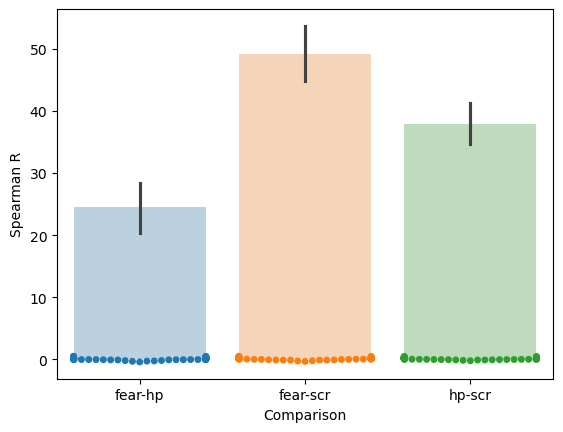

/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mcveigh.k/opt/anaconda3/envs/torch_recommend/lib/python3.10/site-packages/seaborn/categorical.py:3398: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or us

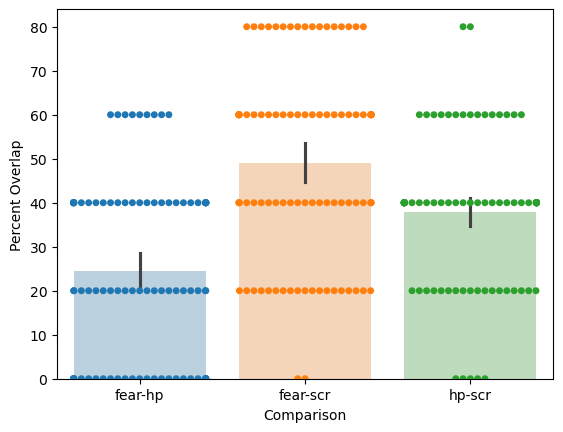

In [118]:
sns.swarmplot(data=[spearman_rs_dict['fear-hp'], spearman_rs_dict['fear-scr'], spearman_rs_dict['hp-scr']])
sns.barplot(data=[spearman_rs_dict['fear-hp'], spearman_rs_dict['fear-scr'], spearman_rs_dict['hp-scr']],alpha=0.33)
plt.xticks([0,1,2],['fear-hp','fear-scr','hp-scr'])
plt.xlabel('Comparison')
plt.ylabel('Spearman R')
plt.savefig('figures/spearman_r.png')
plt.show()


sns.swarmplot(data=[percent_overlap_dict['fear-hp'], percent_overlap_dict['fear-scr'], percent_overlap_dict['hp-scr']])
sns.barplot(data=[percent_overlap_dict['fear-hp'], percent_overlap_dict['fear-scr'], percent_overlap_dict['hp-scr']],alpha=0.33)
plt.xticks([0,1,2],['fear-hp','fear-scr','hp-scr'])
plt.xlabel('Comparison')
plt.ylabel('Percent Overlap')
plt.savefig('figures/percent_overlap.png')
plt.show()

In [105]:
np.mean(percent_overlap_dict['hp-scr'])


36.32958801498126